<a href="https://colab.research.google.com/github/AnushaShivakumar/The-Sparks-Foundation---TASKS/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPARKS FOUNDATION - TASK 1

## Predition using Supervised ML



*   ##### Predict the percentage of an student based on the no. of study hours.


*   This is a simple linear regression task as it involves just 2 variables.

*   You can use R, Python, SAS Enterprise Miner or any other tool




*   Data can be found at http://bit.ly/w-data
*   What will be predicted score if a student studies for 9.25 hrs/ day?





In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Reading the data
data = pd.read_csv('http://bit.ly/w-data')


In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull == True # Check if there any null value in the Dataset

False

**There is no null value in the Dataset so, we can now visualize our Data.**

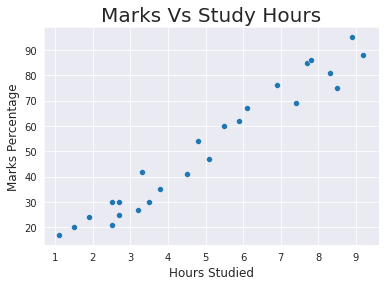

In [ ]:

sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

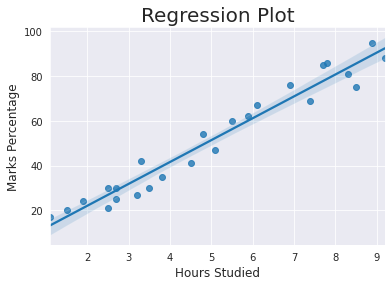

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**

### Training the Model

In [ ]:
# Splitting the Data:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [ ]:
# Spliting the Data in two

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:
# Fitting the Data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")


Model Trained


In [ ]:
# Predicting the Percentage of Marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [ ]:
# Comparing the Predicted Marks with the Actual Marks

compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


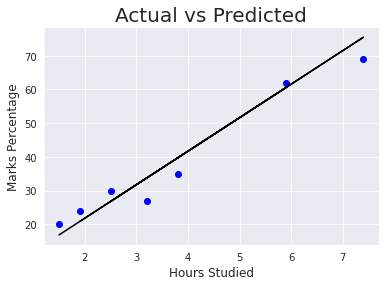

In [ ]:
# Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluation of the Model

In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## Question: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [ ]:

hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**